In [22]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim
from torchvision import datasets
from torch.utils.data import DataLoader
from torchvision.utils import save_image
import torchsummary
from torch.autograd import Variable

In [116]:
num_epochs = 5
batch_size = 64

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [24]:
transform = transforms.ToTensor()

train_data = datasets.MNIST('./data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

val_data = datasets.MNIST('./data', train=False, download=True, transform=transform)
val_loader = DataLoader(val_data, batch_size=batch_size, shuffle=False)

dataloaders = {'train': train_loader, 'val': val_loader}
dataset_sizes = {'train': len(train_data), 'val': len(val_data)}

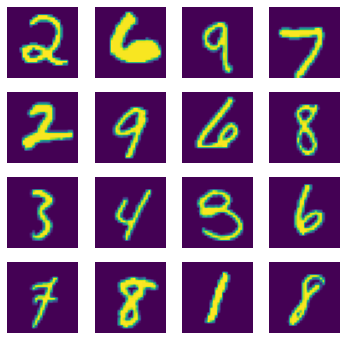

In [105]:
fig = plt.figure(figsize=(6,6))
for i in range(16):
  index = np.random.randint(len(train_data))
  img, label = train_data[index]
  fig.add_subplot(4, 4, i+1)
#  plt.title('label: {}'.format(label))
  plt.axis('off')
  plt.imshow(torch.reshape(img, (28,28)))

In [88]:
def train_model(model, criterion, optimizer, dataloader):
  model.train()
  loss_history = []
  for epoch in range(num_epochs):
    running_loss = 0
    for inputs, _ in dataloader:
        inputs = inputs.view(inputs.shape[0], -1)
        inputs = Variable(inputs.to(device))
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, inputs)
        running_loss += loss.item()
        loss.backward()
        optimizer.step()
    loss_history.append(running_loss / len(dataloader.dataset))
    print('epoch [{}/{}], loss:{:.4f}\n'.format(epoch+1, num_epochs, loss.item()))

  return model, loss_history

In [107]:
class Autoencoder(nn.Module):
  def __init__(self, input_size=28*28):
    super(Autoencoder, self).__init__()
    self.encoder = nn.Sequential(
        nn.Linear(input_size, 64),
        nn.ReLU(),
        nn.Linear(64,64),
        nn.ReLU())
    self.decoder = nn.Sequential(
        nn.Linear(64, input_size),
        nn.ReLU())
  
  def forward(self, x):
    x = self.encoder(x)
    x = self.decoder(x)
    return x


In [108]:
model = Autoencoder().to(device)
criterion = nn.MSELoss().to(device)

optimiser = optim.Adam(model.parameters(), lr=1e-3)

In [118]:
autoencoder, _ = train_model(model, criterion, optimiser, train_loader)

epoch [1/5], loss:0.0154

epoch [2/5], loss:0.0186

epoch [3/5], loss:0.0167

epoch [4/5], loss:0.0164

epoch [5/5], loss:0.0161



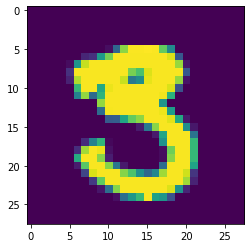

In [121]:
index = np.random.randint(len(val_data))
img, _ = val_data[index]
plt.imshow(torch.reshape(img, (28,28)));

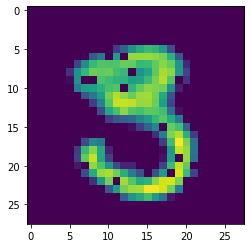

In [122]:
img_encoded = autoencoder(img.view(img.shape[0], -1))
img_encoded = torch.reshape(img_encoded, (28, 28))
plt.imshow(img_encoded.detach());